# 1. Imports 

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data vizualization 
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')

# S.A. and w2v ;)
import re
import collections
# import gensim
import nltk
from nltk.corpus import stopwords

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# reading csv files
data = pd.read_csv('googleplaystore.csv')
# user_reviews = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv')

# 2. Data Exploration

In [3]:
data.shape

(10841, 13)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# 3. Data Cleaning and Preprocessing

In [7]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#calculating the RATING based on mean value
data['Rating'].fillna((data['Rating'].mean()), inplace=True)

In [9]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
#droping the rest of na values
data = data.dropna()

In [11]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
#final data shape
data.shape

(10829, 13)

In [13]:
#check for the duplicated data based on the column APP name
data[data.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [14]:
data[data['App']=="Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [15]:
data.shape

(10829, 13)

In [16]:
data.sort_values(by=['Reviews'], inplace=True)

In [17]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10.0M,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up
2516,RT 516 VET,MEDICAL,4.193338,0,29M,10+,Free,0,Everyone,Medical,"July 13, 2018",300000.1.11,4.0.3 and up
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4.1M,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up
5165,Ferguson AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up
5162,Hilltop AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up


In [18]:
#Drop the duplicates based on the app names
data2 = data.drop_duplicates(keep='last',subset=['App'])

In [19]:
data2.shape

(9648, 13)

In [20]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10.0M,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4.1M,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up
5165,Ferguson AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up
5162,Hilltop AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up
5161,Bayview Hill AH,MEDICAL,4.193338,0,29M,50+,Free,0,Everyone,Medical,"June 6, 2018",300000.1.08,4.0.3 and up


In [21]:
#Converting the Installs number into float value and copying in a different column
data2['Installs_num'] = data2['Installs'].apply(lambda x: float(x.split("+")[0].replace(",","")))

C:\Users\abhijeets\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#converting the price into float values
data2['Price_USD'] = data2['Price'].apply(lambda x: float(x.replace("$","")))

C:\Users\abhijeets\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
#Converting reviews count into int
data2['Reviews_count']= data['Reviews'].apply(lambda x: int(x))

C:\Users\abhijeets\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,Price_USD,Reviews_count
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10.0M,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up,1000.0,0.0,0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4.1M,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up,500.0,0.0,0
5165,Ferguson AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up,100.0,0.0,0
5162,Hilltop AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up,100.0,0.0,0
5161,Bayview Hill AH,MEDICAL,4.193338,0,29M,50+,Free,0,Everyone,Medical,"June 6, 2018",300000.1.08,4.0.3 and up,50.0,0.0,0


In [25]:
len(data2[data2.Size == "Varies with device"])

1226

In [26]:
data2['Size'].replace('Varies with device',np.nan,inplace=True)

C:\Users\abhijeets\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,Price_USD,Reviews_count
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10.0M,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up,1000.0,0.0,0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4.1M,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up,500.0,0.0,0
5165,Ferguson AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up,100.0,0.0,0
5162,Hilltop AH,MEDICAL,4.193338,0,29M,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up,100.0,0.0,0
5161,Bayview Hill AH,MEDICAL,4.193338,0,29M,50+,Free,0,Everyone,Medical,"June 6, 2018",300000.1.08,4.0.3 and up,50.0,0.0,0


In [28]:
data2["Size"] = (data2["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * data2["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(["k","M"], [10**3, 10**6]).astype(int))

C:\Users\abhijeets\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,Price_USD,Reviews_count
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10000000.0,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up,1000.0,0.0,0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4100000.0,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up,500.0,0.0,0
5165,Ferguson AH,MEDICAL,4.193338,0,29000000.0,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up,100.0,0.0,0
5162,Hilltop AH,MEDICAL,4.193338,0,29000000.0,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up,100.0,0.0,0
5161,Bayview Hill AH,MEDICAL,4.193338,0,29000000.0,50+,Free,0,Everyone,Medical,"June 6, 2018",300000.1.08,4.0.3 and up,50.0,0.0,0


In [30]:
data2["Android Ver"].replace('Varies with device',np.nan,inplace=True)

In [34]:
#finding out the minimum android version supported for the apps
data2['min_android_version'] = data2["Android Ver"].apply(lambda x: re.sub("[a-zA-Z]","", str(x)))

In [35]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num,Price_USD,Reviews_count,min_android_version
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,0,10000000.0,"1,000+",Free,0,Everyone,Sports,"December 11, 2017",1.0,4.0 and up,1000.0,0.0,0,4.0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,0,4100000.0,500+,Free,0,Everyone,Business,"January 12, 2018",3.8,4.0.3 and up,500.0,0.0,0,4.0.3
5165,Ferguson AH,MEDICAL,4.193338,0,29000000.0,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up,100.0,0.0,0,4.0.3
5162,Hilltop AH,MEDICAL,4.193338,0,29000000.0,100+,Free,0,Everyone,Medical,"January 10, 2018",300000.0.96,4.0.3 and up,100.0,0.0,0,4.0.3
5161,Bayview Hill AH,MEDICAL,4.193338,0,29000000.0,50+,Free,0,Everyone,Medical,"June 6, 2018",300000.1.08,4.0.3 and up,50.0,0.0,0,4.0.3


In [36]:
data2['Rating'].describe()

count    9648.000000
mean        4.176211
std         0.494433
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [37]:
data2.isna().sum().sort_values(ascending = False)

Size                   1226
Android Ver             989
min_android_version       0
Price                     0
Category                  0
Rating                    0
Reviews                   0
Installs                  0
Type                      0
Content Rating            0
Reviews_count             0
Genres                    0
Last Updated              0
Current Ver               0
Installs_num              0
Price_USD                 0
App                       0
dtype: int64

In [38]:
data2['Size'].fillna((data2['Size'].mean()), inplace=True)

In [39]:
#Our final data frame with all the extra values removed
data3 = data2.drop(['Reviews','Installs','Price','Android Ver'],axis='columns')

In [40]:
data3.head()

,App,Category,Rating,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Installs_num,Price_USD,Reviews_count,min_android_version
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,10000000.0,Free,Everyone,Sports,"December 11, 2017",1.0,1000.0,0.0,0,4.0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,4100000.0,Free,Everyone,Business,"January 12, 2018",3.8,500.0,0.0,0,4.0.3
5165,Ferguson AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"July 17, 2017",300000.0.86,100.0,0.0,0,4.0.3
5162,Hilltop AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"January 10, 2018",300000.0.96,100.0,0.0,0,4.0.3
5161,Bayview Hill AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"June 6, 2018",300000.1.08,50.0,0.0,0,4.0.3


# 4. Data analysis

Text(0, 0.5, 'Count')

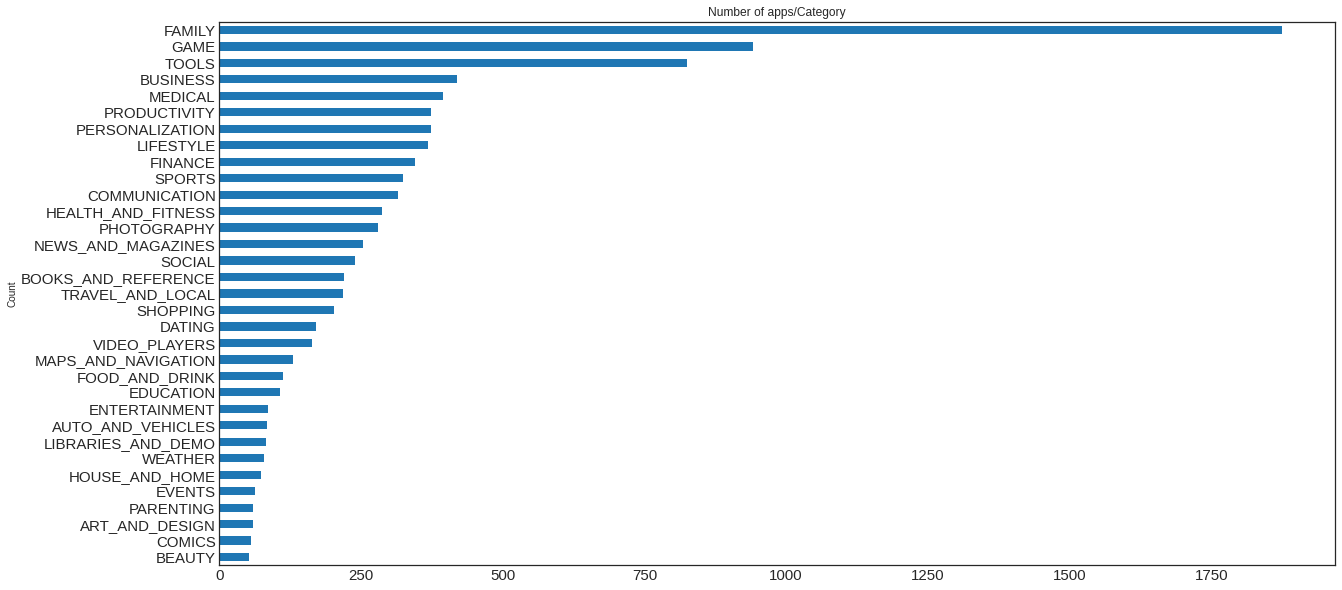

In [41]:
#Total Number of applications in each categories.

fig = plt.figure(figsize=(20,10)) 
data3.groupby('Category').count()["App"].sort_values(ascending=True).plot(kind='barh',title='Number of apps/Category', fontsize=15)
plt.ylabel('Count') 

#how to display %age on secondary axis on bar plot

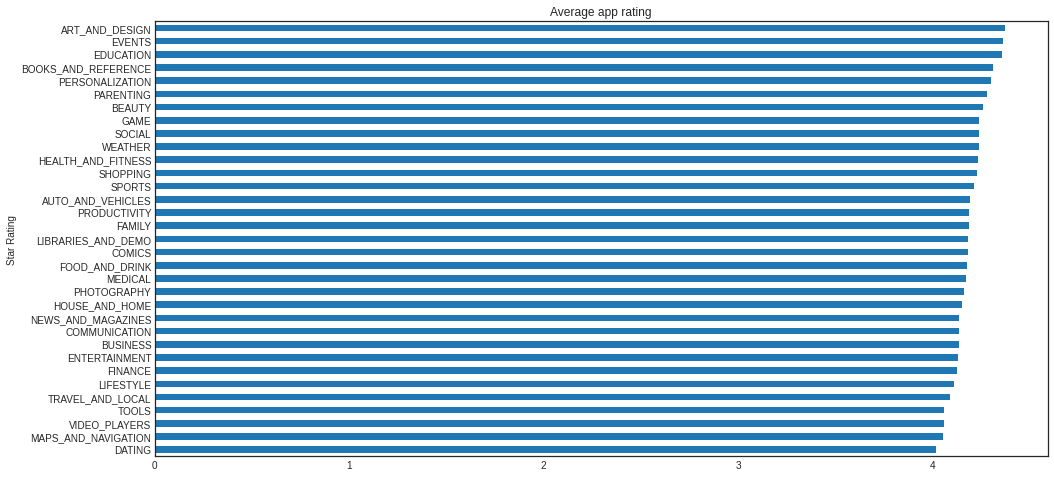

In [42]:
#What is the average rating of the applications in each categories?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').mean().sort_values(by='Rating',ascending='False')['Rating'].plot(kind='barh',title='Average app rating', fontsize=10)
plt.ylabel('Star Rating') 
plt.style.use('seaborn-white')

Text(0.5, 0, 'Average price - USD')

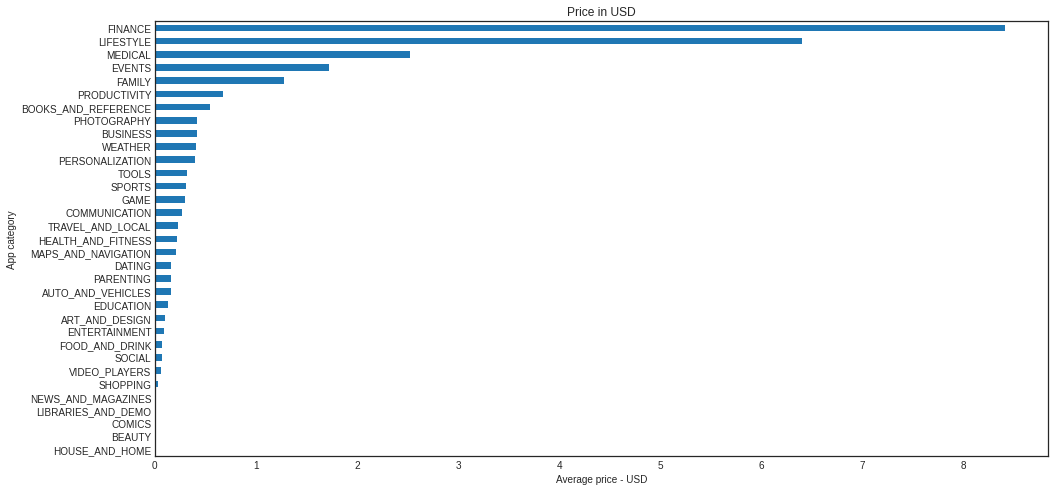

In [43]:
#What is the average price of applications in each categories?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').mean().sort_values(by='Price_USD',ascending='False')['Price_USD'].plot(kind='barh',title='Price in USD', fontsize=10)
plt.ylabel('App category') 
plt.xlabel('Average price - USD') 

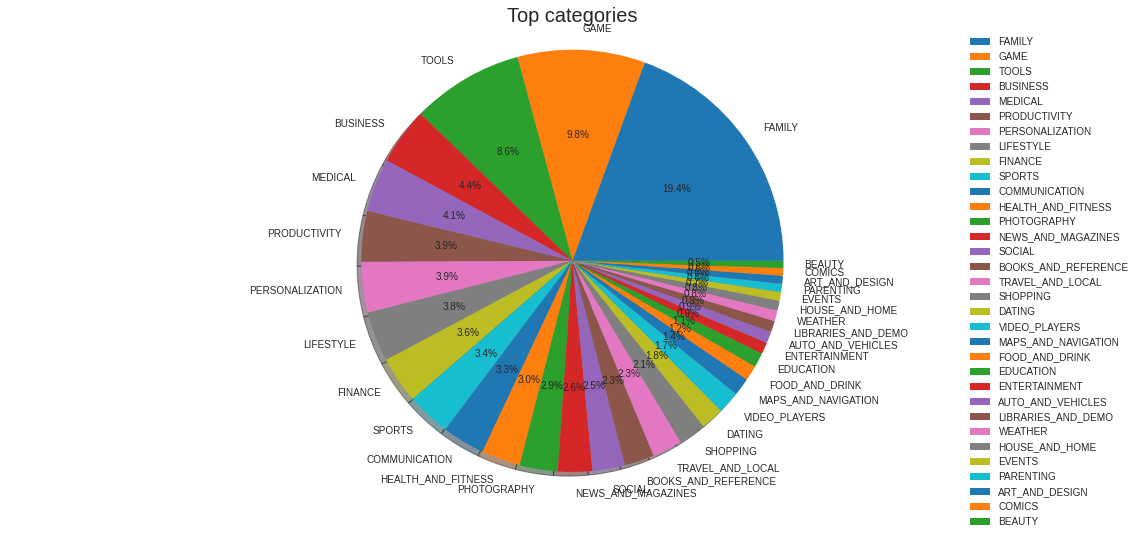

In [44]:
fig = plt.figure(figsize=(16,8)) 
labels = data3['Category'].value_counts(sort = True).index
sizes = data3['Category'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Top categories',size = 20)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
data3.head()

,App,Category,Rating,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Installs_num,Price_USD,Reviews_count,min_android_version
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,10000000.0,Free,Everyone,Sports,"December 11, 2017",1.0,1000.0,0.0,0,4.0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,4100000.0,Free,Everyone,Business,"January 12, 2018",3.8,500.0,0.0,0,4.0.3
5165,Ferguson AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"July 17, 2017",300000.0.86,100.0,0.0,0,4.0.3
5162,Hilltop AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"January 10, 2018",300000.0.96,100.0,0.0,0,4.0.3
5161,Bayview Hill AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"June 6, 2018",300000.1.08,50.0,0.0,0,4.0.3


In [46]:
#What are the applications and categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
#data3["Reviews_count"]==data3.Reviews_count.max()
print("Maximum number of reviews count is of : "+ data3[data3['Reviews_count']==data3.Reviews_count.max()]["App"].iloc[0] + " with a value of " + str(data3.Reviews_count.max()))
print("Maximum Rating is of : "+ data3[data3['Rating']==data3.Rating.max()]["App"].iloc[0] + " with a value of " + str(data3.Rating.max()))
print("Maximum number of installs is of : "+ data3[data3['Installs_num']==data3.Installs_num.max()]["App"].iloc[0] + " with a value of " + str(data3.Installs_num.max()))
print("Maximum price is of : "+ data3[data3['Price_USD']==data3.Price_USD.max()]["App"].iloc[0] + " with a value of " + str(data3.Price_USD.max()))

Maximum number of reviews count is of : Facebook with a value of 78158306
Maximum Rating is of : EC SPORTS with a value of 5.0
Maximum number of installs is of : Skype - free IM & video calls with a value of 1000000000.0
Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


In [47]:
#What is the average size of the applications?
print("Mean size " + str(data3["Size"].mean()/(1024*1024)) + " Mb") #converting in MB
print("Heaviest app size " + str(data3["Size"].max()/(1024*1024)) + " Mb") #converting in MB
print("Smalles app size " + str(data3["Size"].min()/(1024*1024)) + " Mb") #converting in MB

Mean size 19.466126964426948 Mb
Heaviest app size 95.367431640625 Mb
Smalles app size 0.008106231689453125 Mb


Text(0, 0.5, 'Number of Install')

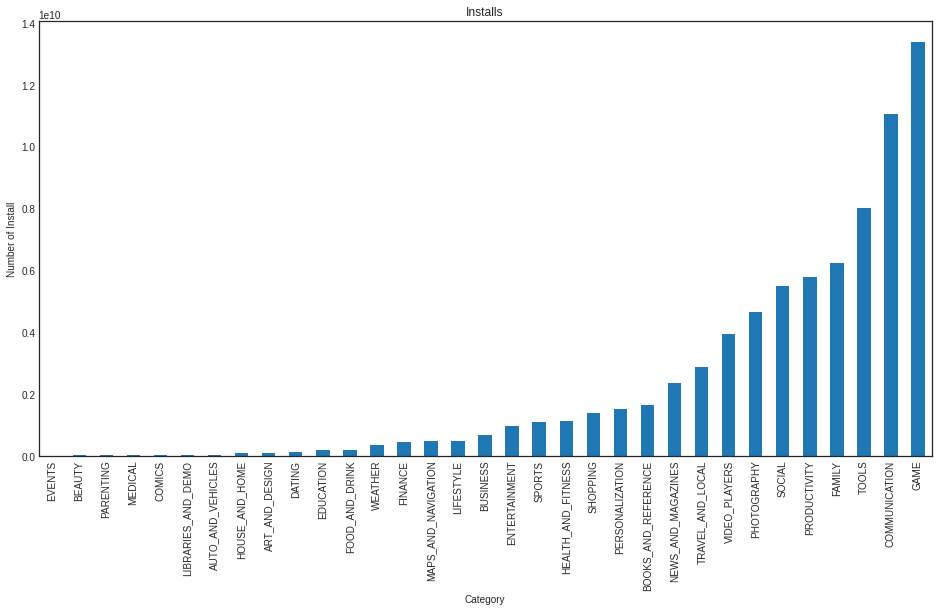

In [48]:
#What are the categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
fig = plt.figure(figsize=(16,8)) 
data3.groupby('Category').sum().sort_values(by='Installs_num',ascending='False')['Installs_num'].plot(kind='bar',title='Installs', fontsize=10)
plt.ylabel('Number of Install') 

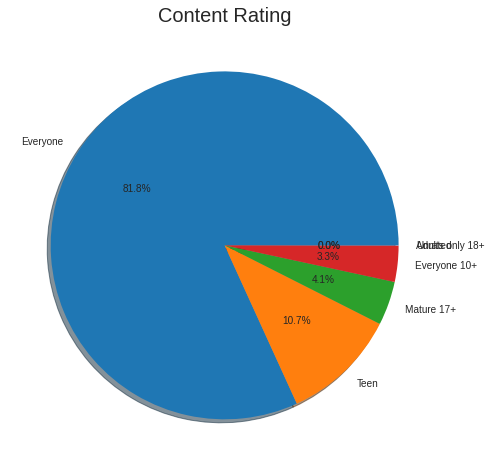

In [49]:
fig = plt.figure(figsize=(16,8)) 
labels = data3['Content Rating'].value_counts(sort = True).index
sizes = data3['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.show()

In [50]:
#added in version 16
data4= data3.copy()

In [51]:
#added in version 16
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0

In [52]:
data3.isna().sum()

App                    0
Category               0
Rating                 0
Size                   0
Type                   0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Installs_num           0
Price_USD              0
Reviews_count          0
min_android_version    0
dtype: int64

In [53]:
data4["is_free"] = data4["Price_USD"].apply(lambda x: int(is_free(x)))

In [54]:
data4.head()

,App,Category,Rating,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Installs_num,Price_USD,Reviews_count,min_android_version,is_free
5086,Apps for SportsBєtting.ag - Bitcoin Welcome here!,SPORTS,4.193338,10000000.0,Free,Everyone,Sports,"December 11, 2017",1.0,1000.0,0.0,0,4.0,0
7728,HR Team CQ Region Ed Qld,BUSINESS,4.193338,4100000.0,Free,Everyone,Business,"January 12, 2018",3.8,500.0,0.0,0,4.0.3,0
5165,Ferguson AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"July 17, 2017",300000.0.86,100.0,0.0,0,4.0.3,0
5162,Hilltop AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"January 10, 2018",300000.0.96,100.0,0.0,0,4.0.3,0
5161,Bayview Hill AH,MEDICAL,4.193338,29000000.0,Free,Everyone,Medical,"June 6, 2018",300000.1.08,50.0,0.0,0,4.0.3,0


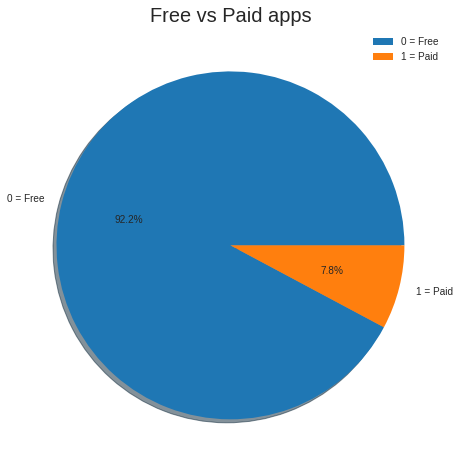

In [55]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = data4['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

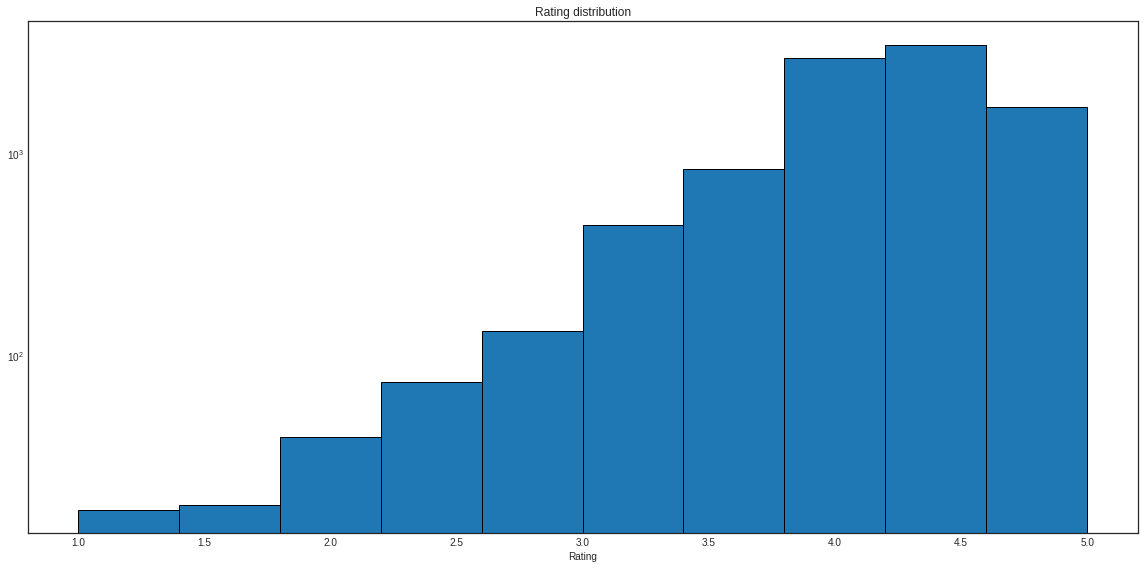

In [56]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(data3['Rating'],edgecolor = 'black', log=True)
plt.title("Rating distribution")
plt.xlabel('Rating')
plt.tight_layout()
plt.legend()

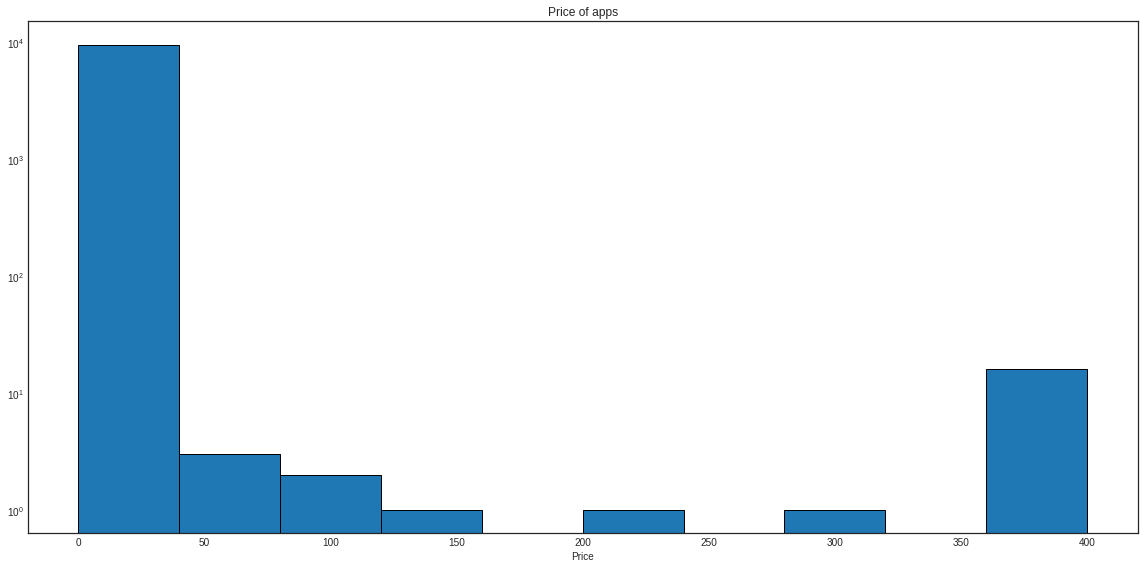

In [57]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(data3['Price_USD'],edgecolor = 'black', log=True)
plt.title("Price of apps")
plt.xlabel('Price')
plt.tight_layout()
plt.legend()

# Observations

* Finance apps are the costliest one
* Games are the most installed category of the apps.
* Average rating is irrelevant to the category
* Around 19.7% of the apps are related to family
* 81.8% of the apps belong to everyone category